<a href="https://colab.research.google.com/github/RobertoFernandez1/EIE_401_MULTIMEDIA/blob/main/Actividad_4_FernandezRoberto_RoberoFernandez1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 4</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Roberto Fernandez Fuentes</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Realiza la operación de convolución

<p align="justify">
Una de las operaciones más comunes en tratamiento de imagenes, video etc, es la convolución. Comienza por realizar una convolución entre una señal Pulso y una función impulso filtrada.


<center><img src="https://github.com/Jorgecardenas1/EIE_401_MULTIMEDIA/blob/main/assets/scipy-signal-convolution.png?raw=1"/></center>


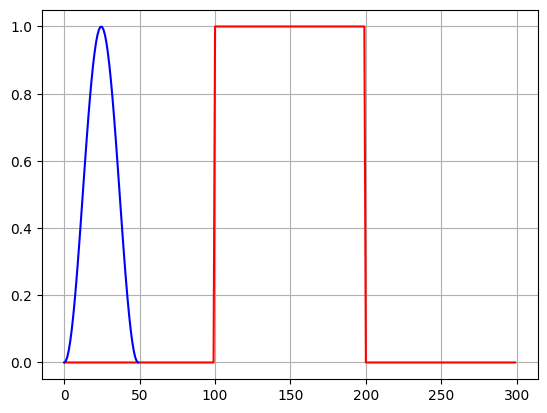

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
sig=np.repeat([0., 1., 0.],100) #establecemos un señal cuadrada
win=signal.windows.hann(50) #establecemos una señal ventana

plt.plot(sig,color ="r")
plt.plot(win,color="b")
plt.grid()


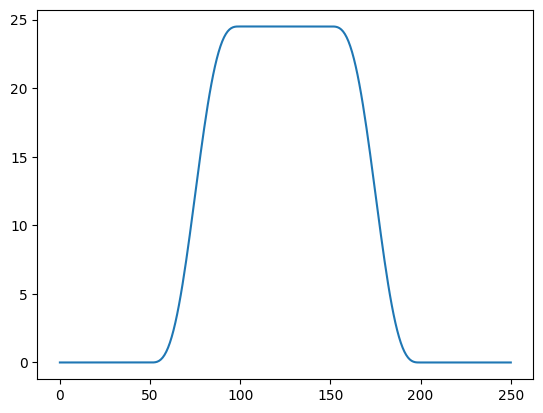

In [4]:
signal_filtreded_1=signal.convolve(sig,win,mode="valid") #Convolucion entre ambas señales
plt.plot(signal_filtreded_1)

## 2. Cancelación de Ruido (Denoising)
<p align="justify">
Implementa un algoritmo para eliminar el ruido de una señal. Puedes apoyarte en esta referencia (https://www.youtube.com/watch?v=s2K1JfNR7Sc)

1. Debes tener la señal original
2. Debes agregar ruido a la señal
3. Obtener el valor medio de la señal con ruido
4. Implementar transformaciones y filtrado.
    


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
dt=0.001
t=np.arange(0,1,dt)
f1=np.sin(2*np.pi*50*t)
f2=np.exp(t)
f=f1+f2
#establecemos una señal sin(2pi*50*t)+e(t) y le agregamos ruido
f_clean=f
f=f+2.5*np.random.randn(len(t))
plt.plot(t,f,color="c",linewidth=1.5)
plt.plot(t,f_clean,color="k",linewidth=2)
plt.xlim(t[0],t[-1])
plt.legend()

In [ ]:
n=len(t)
fhat=np.fft.fft(f,n)#Calculamos mediante el comando np.fft.fft la transformada de fourier
PSD=fhat*np.conj(fhat)/n
freq=(1/dt*n)*np.arange(n)
L=np.arange(1,np.floor(n/2),dtype="int")
fig,axs= plt.subplots(2,1)
plt.sca(axs[0])
plt.plot(t, f, color="c", linewidth=1.5, label="Noisy")
plt.plot(t,f_clean,color="k",linewidth=2,label="clean")
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color="c",linewidth=2,label="Noisy")
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()


plt.show()

In [ ]:
indices=PSD>100
PSDclean=PSD*indices
fhat=indices=fhat
ffilt=np.fft.ifft(fhat) #Eliminamos el ruido de le señal

In [ ]:
fig,axs=plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color="c",linewidth=1.5,label="Noisy")
plt.plot(t,f_clean,color="k",linewidth=2,label="Clean")
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,ffilt,color="k",linewidth=2,label="Filtred")
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color="c",linewidth=2,label="noisy")
plt.plot(freq[L],PSDclean[L],color="k",linewidth=1.5,label="Filtred")
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.show()

## 3. Wavelets
### 3.1 Desarrolla una transformada wavelet 1D
<p align="justify">
Implementa transformaciones con 1-D wavelet usando la función Mexican Hat Wavelet.

$$m(x) = \frac{2}{\sqrt{3 \sigma} \pi^{\frac{1}{4}}} \left(1-\frac{x^2}{\sigma^2}\right) e^{\frac{-x^2}{2 \sigma^2}}$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mexican_hat(x, mu, sigma):
  factor1=2/((np.sqrt(3)*sigma)*np.pi**(1/4)) #subdividimos en 3 factores el mexican hut por simplicidad
  factor2=(1-(x**2)/sigma**2)
  wavelet=factor1*factor2*np.exp(-x**2/(2*sigma**2))
  return wavelet



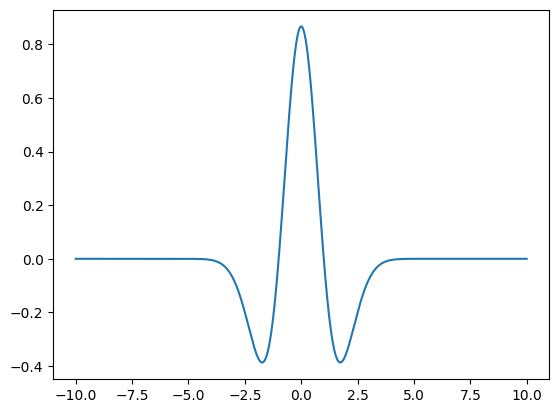

In [ ]:
x=np.linspace(-10,10,1000)
y=mexican_hat(x,0,1)

plt.plot(x,y)

### 3.2 Escribe un algoritmo para calcular la transformada discreta
<p align="justify">
En cierta forma se trata solo de aplicar al sumatoria sobre una señal que tengas (obviamente debes definir una señal de estudio, con ruido o que tenga varías frecuencias involucradas).

Debes hacerlo solo para un nivel (level). Recuerda que la transformada trabaja por niveles y puede ser dispendioso. En este caso de debe considerar que $$a_0=2$$ y $$b_0=1$$, así como también debe asumir un valor específico para _m_.

En teoría, la transformada es como sigue:

$$ (T^{\text{wav}} f)(a,b) = \sqrt{|a|} \int dt \; f(t) \psi \left(\frac{t-b}{a}\right) $$

$a = a_0^m$ and $b = n b_0 a_0^m$

Aquí a y b son parámetros para la escala y posición de la wavelet. Esto se puede escribir de forma discreta de tal forma que puedas asignar una posición y escala a la onda asignando los valores que quieres, pero en este caso usarás $$a_0=2$$ y $$b_0=1$$.

$$ (T^{\text{wav}} f)(a,b) = T^\text{wav}_{m,n}(f) = \int dt \; f(t) \psi_{m,n} (x) $$
con
$$ \psi_{m,n} = a_0^{\frac{-m}{2}} \psi\left(a_0^{-m}x - nb_0\right) $$

### Recuerda que la integral se convierte en una sumatoria.

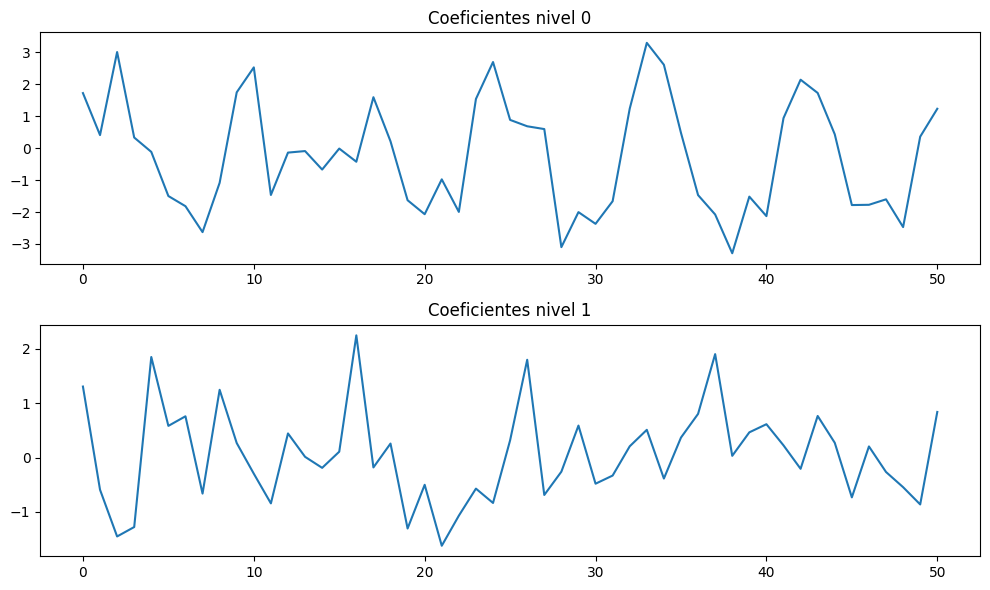

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

t=np.linspace(0,10,100)
a=np.sin(2*np.pi*50*t)
b=np.cos(2*np.pi*60*t)
c=a+b
ruido = np.random.normal(0, 0.9, len(t))
c_con_ruido = c + ruido #Señal con ruido

# Definir los parámetros de la DWT
wavelet = 'db2'
level = 1

# Calcular la DWT
coefficients = pywt.wavedec(c_con_ruido, wavelet, level=level)

# Graficar los coeficientes de la DWT

plt.figure(figsize=(10, 6))
for i in range(len(coefficients)):
    plt.subplot(level+1, 1, i+1)
    plt.plot(coefficients[i])
    plt.title(f'Coeficientes nivel {i}')
plt.tight_layout()
plt.show()

###  3.2.1. Explica el siguiente fragmento de código en detalle

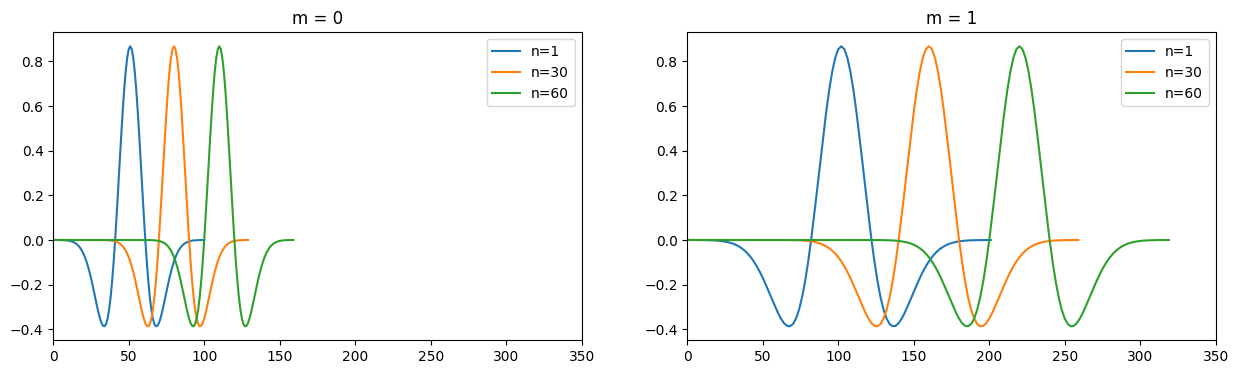

In [ ]:

# we assume a0 = 2 and b0 = 1
# These are the scaling and translation factors
#using just o pair, means an specific wavelet
def psi_mn(psi, m, n): #Llamamos una funcion
    a = 2**m #Calcula el factor de escala para la wavelet
    b = n*2**m #Calcula el desplazamiento
    wav = np.zeros(len(psi)*a + b) #arreglo para contener el factor de escala y desplazamiento de la wavelet
    wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi) #interpola la wavelet original para ajustarla al nuevo valor de escala
    return wav #llamamos devuelta a la variable wav

psi = mexican_hat(np.arange(-5,5,0.1),0,1) #Llamamos a la funcion mexican_hut y se establece un rango de valores entre -5 y 5 con paso de 0.1 ,y parametros 0 y 1
xlim = (0,350)
ns = [1, 30, 60] #rango de valores para n
ms = [0, 1] #rango de valores de m
plt.figure(figsize=(15,4))
plt.subplot(121)

for mi in range(len(ms)): #ciclo for que va desde la variable mi hasta el largo de la variable ms
    m = ms[mi] #rango de valores que se establece para el factor de escala y desplazamiento
    plt.subplot(1,len(ms),mi+1) #Nos genera dos graficos ,uno para m=0 y otro para m=1
    for n in ns:
        plt.plot(psi_mn(psi, m, n), label="n="+str(n)) #se utiliza para graficar la wavelet escalada y desplazada para el nivel m y el índice n.
    plt.title("m = "+str(m))
    plt.legend(loc="best")
    plt.xlim(xlim)
plt.show()

### 3.2.2 completa el siguiente código para realizar la transformada


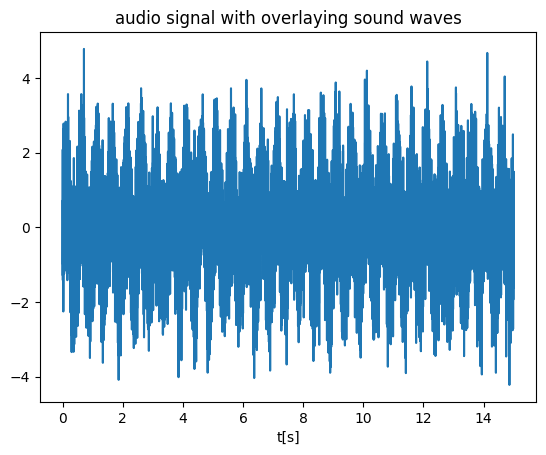

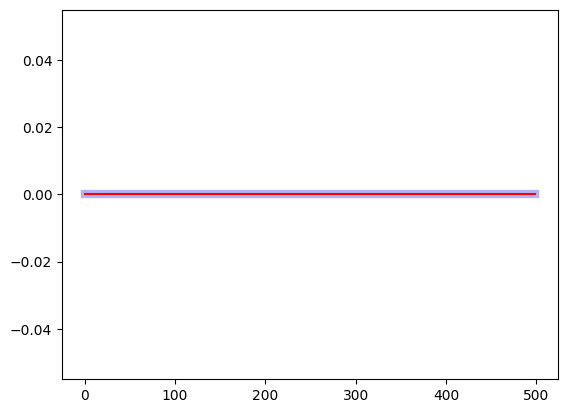

In [ ]:

"""Transformed considering the sum over the section under study"""
def twav_mn(f, psi, m, n):
    f_scaled = 0
    transform_scaled =  0
    return transform_scaled

"""Naive Transform adding over the whole length"""

def twav_mn_naive(f, psi, m, n):
    pmn = 0
    transform = 0
    return transform


m = 3 #single value for m
ns = np.arange(1000,1500)
res=1000 #resolution
freq=2 #frequency
"""Creating a wave to analyse"""
x = np.arange(0,15000,1) # Produces [0, 100) with steps of 2.
noise = np.random.normal(0,1, len(x)) #  μ = 0, σ = 2, size = length of x or y. Choose μ and σ wisely.
#adding noise
audio=np.sin(np.arange(15000)*2*np.pi*freq/res)+noise


transformed_sweept=[twav_mn(audio, psi, m, n) for n in ns]
naive_transformed_sweept=[twav_mn_naive(audio, psi, m, n) for n in ns]

plt.plot(np.arange(len(audio),dtype="float32")/res,audio)
plt.xlabel("t[s]")
plt.title("audio signal with overlaying sound waves")
plt.show()



plt.plot(transformed_sweept,color="blue", lw=6, alpha=0.3)
plt.plot(naive_transformed_sweept, "r-")
plt.show()

### 3.2 Wavelet usando librería
<p align="justify">
Usa la librería PyWavelets (pywt) con los datos provenientes del dataset  = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat". Estos datos son históricos sobre el fenómeno del Niño.

0. Debes descargar los datos desde python, usando numpy o pandas, debes aplicar la transformada continua pywt.cwt.

1. Obtendrás los coeficientes de la transformación.
2. Debes poner todos los resultados en términos de potencia.
3. Debes graficar el resultado tanto en el periodo como en la frecuencia usando un plot tipo contour.

     -0.15
0    -0.30
1    -0.14
2    -0.41
3    -0.46
4    -0.66
..     ...
498  -0.22
499   0.08
500  -0.08
501  -0.18
502  -0.06

[503 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/pywt/_cwt.py:121: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


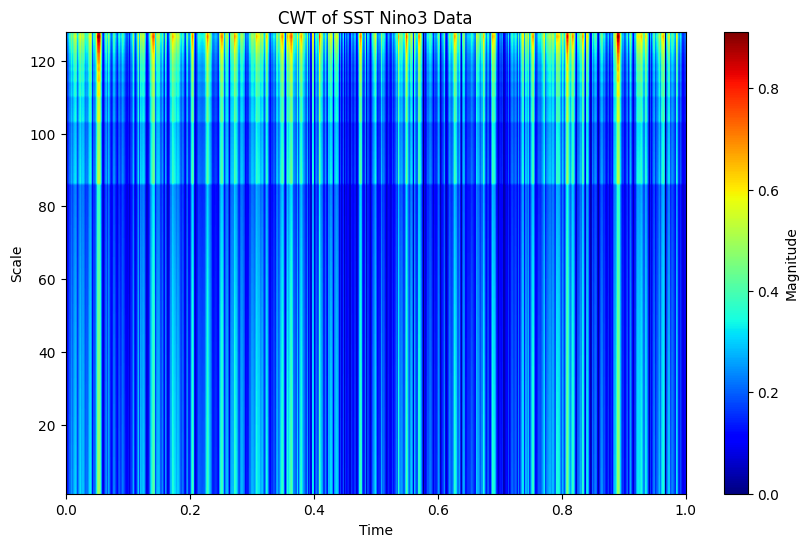

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pandas as pd


link = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
df = pd.read_table(link) #Llamamos a los datos
print(df)
df
signal = np.array(df)  # Convertir los datos a un array NumPy

coefficients, frequencies = pywt.cwt(signal, scales=np.arange(1, 128), wavelet='cmor') #Ploteamos los datos recopilidos en una wavelet

plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coefficients)**0.5, aspect='auto', cmap='jet', extent=[0, 1, 1, 128])
plt.colorbar(label="Magnitude")
plt.ylabel("Scale")
plt.xlabel("Time")
plt.title("CWT of SST Nino3 Data")
plt.show()

### 3.3 Interpreta los resultados del punto anterior.
<p align="justify">
Debes explicar que significa el gráfico obtenido  en términos del periodo o frecuencia del evento que estamos analizando.

El gráfico muestra cómo varía la temperatura superficial del mar en la región del Niño 3 a lo largo del tiempo, representado en el eje horizontal. Las diferentes bandas de color y la intensidad de los colores en el gráfico indican la magnitud de estas variaciones en diferentes escalas temporales. Por ejemplo, las áreas más brillantes o más oscuras pueden representar cambios más significativos o eventos específicos en la temperatura superficial del mar.








## 4. Referencias
<p align="justify">

https://notebook.community/CSchoel/learn-wavelets/wavelet-introduction

https://www.kaggle.com/code/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

https://pywavelets.readthedocs.io/en/latest/ref/cwt.html

[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Cancelación de ruido en datos] https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71

[Convolución en Scipy]https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

[Wavelet transform applications]https://scicoding.com/introduction-to-wavelet-transform-using-python/